In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

plt.rcParams.update({"font.size" : 16, "font.family" : "serif", "figure.figsize" : (8,8)})
vmin = -5.0
vmax = 2.0

In [26]:
@njit
def ising_energy(field, J=1):
    n = field.shape[0]
    
    energy = 0
    for i in range(n):
        for j in range(n):
            energy += -J*field[i, j] * (field[i, (j+1)%n] + field[i, (j-1)%n] + field[(i+1)%n,j] + field[(i-1)%n,j])
    return energy



@njit
def ising_simulation(field, J=1, T=0.05, maxiter=int(1e8), step=int(1e6), eps=5e-4):
    #init
    n = field.shape[0]
    
    #to flip or not to flip
    rand_positions = np.random.randint(low=0, high=n, size=2*maxiter).reshape(-1, 2)
    rand_decision = np.random.random(maxiter)

    temp_E = ising_energy(field)
    #Ising steps, Monte-Carlo
    for idx in range(maxiter):
        i, j = rand_positions[idx]
        energy = -J*field[i, j] * (field[i, (j+1)%n] + field[i, (j-1)%n] + field[(i+1)%n,j] + field[(i-1)%n,j])

        if energy > 0 or rand_decision[idx] < np.exp(2*energy/T):
            field[i, j] = -field[i, j]
    
        if (idx+1) % step == 0:
            temp_E2 = ising_energy(field)
            delta = np.abs(temp_E2 - temp_E)
            
            if delta < eps * np.abs(temp_E):
                break
            else:
                temp_E = temp_E2
                
    return field, np.abs(delta/temp_E), idx+1


def magnetization(field):
    return np.sum(field)

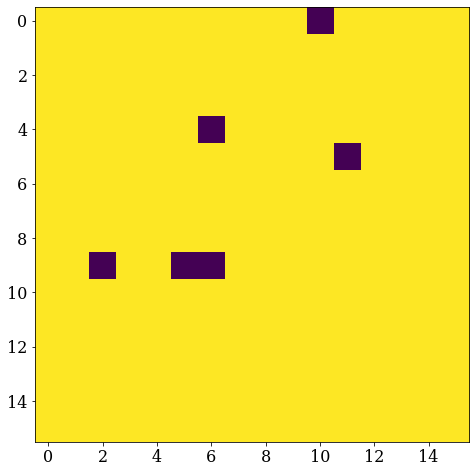

In [100]:
field = np.random.choice([-1,1], p=[0.5,0.5], size=(16,16))
field = ising_simulation(field, maxiter=int(1e7), T=2.0)[0]

plt.imshow(field)

In [70]:
M = []
for _ in range(100000):
    field = ising_simulation(field, maxiter=int(1e0), T=2.0)[0]
    M.append(magnetization(field))

In [71]:
def autocorrelation(M):
    return np.correlate

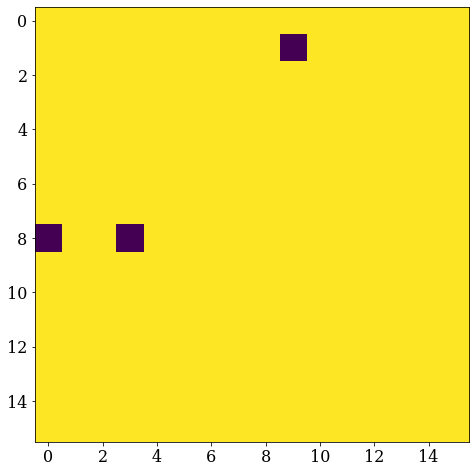

In [72]:
plt.imshow(field)

In [73]:
autocorr = np.correlate(M, M, mode='full')/(np.mean(np.array(M)**2)-np.mean(M)**2)

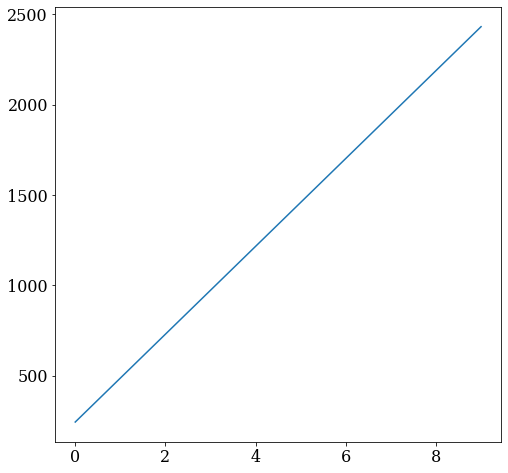

In [74]:
plt.plot(autocorr[:10])